In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(51)
np.random.seed(51)
print(tf.__version__)

2.0.0-alpha0


In [21]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 10
batch_size = 32
shuffle_buffer_size = 1000

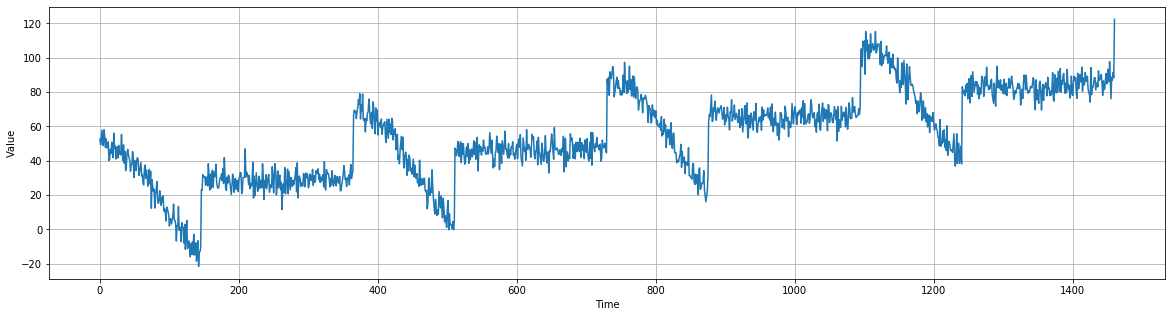

In [4]:
plt.figure(figsize=(20,5))
plot_series(time,series)

In [22]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    
    # Create dataset from numpy
    dataset = tf.data.Dataset.from_tensor_slices(series) 
    # Create windowed dataset with fixed shape
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True) 
    #Create a batch for each window and flatten it (convert to tensor)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1)) 
    # Shuffle data
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    # Create batches
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

# LSTM :

In [28]:
# Create Train dataset
tf.keras.backend.clear_session()
train_set = windowed_dataset(x_train, window_size, batch_size=32, shuffle_buffer=shuffle_buffer_size)

# Build RNN model :

model = tf.keras.models.Sequential([
        tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=-1),input_shape=[None]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Dense(1),
        tf.keras.layers.Lambda(lambda x:100*x)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])


history = model.fit(train_set,epochs=200)

Epoch 1/200
31/31 [==============================] - 18s 586ms/step - loss: 47.9679 - mae: 48.5157
Epoch 2/200
31/31 [==============================] - 0s 12ms/step - loss: 15.7032 - mae: 16.1950
Epoch 3/200
31/31 [==============================] - 0s 12ms/step - loss: 13.0003 - mae: 13.4892
Epoch 4/200
31/31 [==============================] - 0s 13ms/step - loss: 10.2325 - mae: 10.7202
Epoch 5/200
31/31 [==============================] - 0s 13ms/step - loss: 8.5626 - mae: 9.0505
Epoch 6/200
31/31 [==============================] - 0s 12ms/step - loss: 7.5868 - mae: 8.0722
Epoch 7/200
31/31 [==============================] - 0s 13ms/step - loss: 7.3932 - mae: 7.8774
Epoch 8/200
31/31 [==============================] - 0s 13ms/step - loss: 7.4549 - mae: 7.9403
Epoch 9/200
31/31 [==============================] - 0s 12ms/step - loss: 6.9044 - mae: 7.3861
Epoch 10/200
31/31 [==============================] - 0s 12ms/step - loss: 6.4095 - mae: 6.8944
Epoch 11/200
31/31 [===================

31/31 [==============================] - 0s 11ms/step - loss: 4.7010 - mae: 5.1797
Epoch 87/200
31/31 [==============================] - 0s 11ms/step - loss: 4.6974 - mae: 5.1758
Epoch 88/200
31/31 [==============================] - 0s 12ms/step - loss: 4.6938 - mae: 5.1721
Epoch 89/200
31/31 [==============================] - 0s 12ms/step - loss: 4.6903 - mae: 5.1684
Epoch 90/200
31/31 [==============================] - 0s 12ms/step - loss: 4.6868 - mae: 5.1647
Epoch 91/200
31/31 [==============================] - 0s 12ms/step - loss: 4.6834 - mae: 5.1612
Epoch 92/200
31/31 [==============================] - 0s 12ms/step - loss: 4.6800 - mae: 5.1577
Epoch 93/200
31/31 [==============================] - 0s 11ms/step - loss: 4.6767 - mae: 5.1541
Epoch 94/200
31/31 [==============================] - 0s 11ms/step - loss: 4.6733 - mae: 5.1507
Epoch 95/200
31/31 [==============================] - 0s 12ms/step - loss: 4.6700 - mae: 5.1472
Epoch 96/200
31/31 [==============================] -

31/31 [==============================] - 0s 11ms/step - loss: 4.4937 - mae: 4.9685
Epoch 171/200
31/31 [==============================] - 0s 11ms/step - loss: 4.4922 - mae: 4.9669
Epoch 172/200
31/31 [==============================] - 0s 11ms/step - loss: 4.4907 - mae: 4.9652
Epoch 173/200
31/31 [==============================] - 0s 12ms/step - loss: 4.4892 - mae: 4.9636
Epoch 174/200
31/31 [==============================] - 0s 12ms/step - loss: 4.4877 - mae: 4.9621
Epoch 175/200
31/31 [==============================] - 0s 12ms/step - loss: 4.4863 - mae: 4.9605
Epoch 176/200
31/31 [==============================] - 0s 12ms/step - loss: 4.4849 - mae: 4.9590
Epoch 177/200
31/31 [==============================] - 0s 11ms/step - loss: 4.4835 - mae: 4.9575
Epoch 178/200
31/31 [==============================] - 0s 11ms/step - loss: 4.4822 - mae: 4.9561
Epoch 179/200
31/31 [==============================] - 0s 11ms/step - loss: 4.4808 - mae: 4.9548
Epoch 180/200
31/31 [=======================

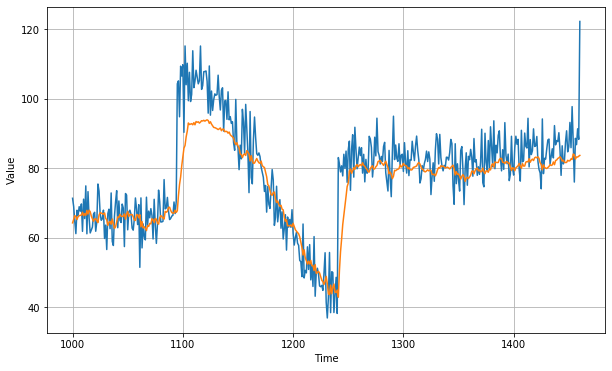

In [29]:
forecast=[]
for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [30]:
print('Validation MAE = {}'.format(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()))

SyntaxError: unexpected EOF while parsing (<ipython-input-30-edb3be6f57ff>, line 1)

# Bidirectional LSTM:

In [24]:
# Create Train dataset
tf.keras.backend.clear_session()
train_set = windowed_dataset(x_train, window_size, batch_size=32, shuffle_buffer=shuffle_buffer_size)

# Build RNN model :

model = tf.keras.models.Sequential([
        tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=-1),input_shape=[None]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Dense(1),
        tf.keras.layers.Lambda(lambda x:100*x)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])


history = model.fit(train_set,epochs=200)

Epoch 1/200
31/31 [==============================] - 17s 544ms/step - loss: 17.9991 - mae: 18.4993: 19.2334 - m
Epoch 2/200
31/31 [==============================] - 0s 15ms/step - loss: 14.7746 - mae: 15.2655
Epoch 3/200
31/31 [==============================] - 0s 15ms/step - loss: 13.8654 - mae: 14.3588
Epoch 4/200
31/31 [==============================] - 0s 15ms/step - loss: 12.9691 - mae: 13.4644
Epoch 5/200
31/31 [==============================] - 0s 15ms/step - loss: 12.0090 - mae: 12.5010
Epoch 6/200
31/31 [==============================] - 0s 15ms/step - loss: 10.9806 - mae: 11.4736
Epoch 7/200
31/31 [==============================] - 0s 16ms/step - loss: 9.8619 - mae: 10.3530
Epoch 8/200
31/31 [==============================] - 0s 15ms/step - loss: 8.7479 - mae: 9.2373
Epoch 9/200
31/31 [==============================] - 0s 15ms/step - loss: 7.8117 - mae: 8.2975
Epoch 10/200
31/31 [==============================] - 0s 15ms/step - loss: 7.1234 - mae: 7.6068
Epoch 11/200
31/31 [=

31/31 [==============================] - 0s 12ms/step - loss: 4.7351 - mae: 5.2113
Epoch 87/200
31/31 [==============================] - 0s 11ms/step - loss: 4.7324 - mae: 5.2085
Epoch 88/200
31/31 [==============================] - 0s 12ms/step - loss: 4.7298 - mae: 5.2057
Epoch 89/200
31/31 [==============================] - 0s 12ms/step - loss: 4.7272 - mae: 5.2030
Epoch 90/200
31/31 [==============================] - 0s 11ms/step - loss: 4.7247 - mae: 5.2003
Epoch 91/200
31/31 [==============================] - 0s 12ms/step - loss: 4.7222 - mae: 5.1977
Epoch 92/200
31/31 [==============================] - 0s 12ms/step - loss: 4.7197 - mae: 5.1951
Epoch 93/200
31/31 [==============================] - 0s 11ms/step - loss: 4.7173 - mae: 5.1926
Epoch 94/200
31/31 [==============================] - 0s 12ms/step - loss: 4.7150 - mae: 5.1901
Epoch 95/200
31/31 [==============================] - 0s 11ms/step - loss: 4.7126 - mae: 5.1876
Epoch 96/200
31/31 [==============================] -

31/31 [==============================] - 0s 12ms/step - loss: 4.5559 - mae: 5.0352
Epoch 171/200
31/31 [==============================] - 0s 12ms/step - loss: 4.5547 - mae: 5.0340
Epoch 172/200
31/31 [==============================] - 0s 12ms/step - loss: 4.5535 - mae: 5.0329
Epoch 173/200
31/31 [==============================] - 0s 12ms/step - loss: 4.5523 - mae: 5.0317
Epoch 174/200
31/31 [==============================] - 0s 11ms/step - loss: 4.5512 - mae: 5.0306
Epoch 175/200
31/31 [==============================] - 0s 11ms/step - loss: 4.5501 - mae: 5.0295
Epoch 176/200
31/31 [==============================] - 0s 12ms/step - loss: 4.5490 - mae: 5.0284
Epoch 177/200
31/31 [==============================] - 0s 11ms/step - loss: 4.5479 - mae: 5.0273
Epoch 178/200
31/31 [==============================] - 0s 12ms/step - loss: 4.5468 - mae: 5.0263
Epoch 179/200
31/31 [==============================] - 0s 12ms/step - loss: 4.5458 - mae: 5.0252
Epoch 180/200
31/31 [=======================

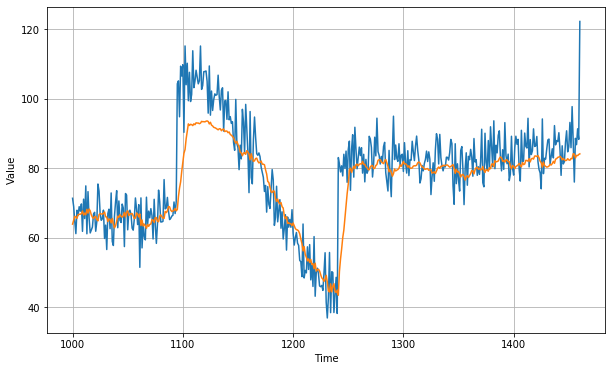

In [25]:
forecast=[]
for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [27]:
print('Validation MAE = {}'.format(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()))

Validation MAE = 5.911908149719238
